## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [2]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [3]:
url = "https://raw.githubusercontent.com/Zwelious/DM_W2/refs/heads/main/property_dataset.csv"
data = pd.read_csv(url)
data.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [4]:
data.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


Most properties have a land area between 96 m² and 286 m² and a building area between 120 m² and 332.5 m².
The majority of properties have 3 to 5 rooms, 2 to 4 bathrooms, and 2 floors.
Some outliers are present, such as properties with significantly larger areas (e.g., land area of 1561 m²) or a high number of rooms and bathrooms (13 each).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


The dataset is rich in property features but has some missing data that may require handling (e.g., imputation or exclusion) depending on the analysis goals.
Columns with improper data types (e.g., Harga Penawaran (dari Owner)) should be cleaned and converted for consistency.
Significant missing data in categorical columns like Arah Hadap Rumah and Posisi Rumah may reduce the usefulness of these features in certain analyses or models.

Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [6]:
data.isnull().sum()

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [7]:
data.isnull().sum() / len(data) * 100

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [8]:
imputer = SimpleImputer(strategy='most_frequent')

data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [9]:
data.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [10]:
data = data.drop('Nama Daerah', axis=1)

3.

In [11]:
label_encoder = LabelEncoder()
area_category_map = {"Standard": 3, "Below Standard": 4, "Sangat Premium": 1, "Premium": 2}
terjual_map = {"Belum": 1}
lebar_jalan_map = {"1-2 Mobil": 2, "< 1 Mobil": 1, "> 2 Mobil": 3}

data['Area Category'] = data['Area Category'].map(area_category_map)
data['Terjual/Belum'] = data['Terjual/Belum'].map(terjual_map)
data['Arah Hadap Rumah'] = label_encoder.fit_transform(data['Arah Hadap Rumah'])
data['Posisi Rumah'] = label_encoder.fit_transform(data['Posisi Rumah'])
data['Lebar Jalan Depan Rumah (ROW)'] = data['Lebar Jalan Depan Rumah (ROW)'].map(lebar_jalan_map)
data.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [12]:
data['Harga Penawaran (dari Owner)'] = data['Harga Penawaran (dari Owner)'].replace(" ", "10500000000")
data['Harga Penawaran (dari Owner)'] = data['Harga Penawaran (dari Owner)'].str.replace(r"[.,]", "", regex=True)


check the data type

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int64 
 9   Posisi Rumah                   308 non-null    int64 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [14]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype(int)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [16]:
sc = StandardScaler()

data = pd.DataFrame(sc.fit_transform(data), columns=data.columns)

data.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.598758
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,-2.406773
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.598758
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.598758
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.598758


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

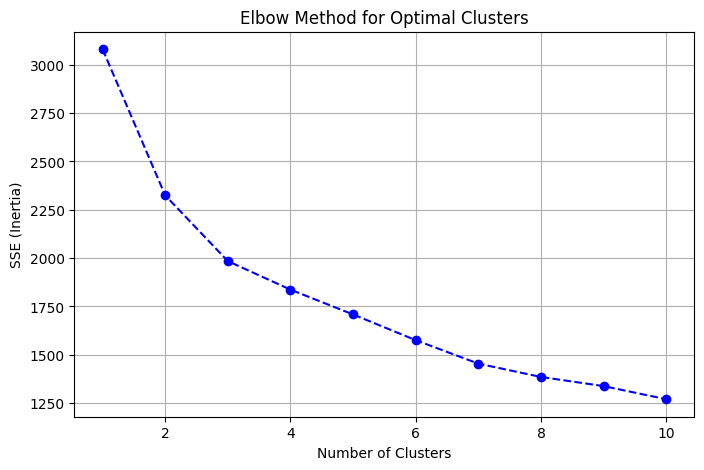

In [18]:
sse = []  # List to store the Sum of Squared Errors (SSE)

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(data)  # Fit the scaled data
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title("Elbow Method for Optimal Clusters")
plt.grid()
plt.show()

In [19]:

from kneed import KneeLocator
findknee = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
best_k = findknee.knee
print("The best number of clusters (k) for your model is:", best_k)


The best number of clusters (k) for your model is: 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [20]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(data)

In [21]:
# Inverse transform the scaled data to get the original values
data = pd.DataFrame(sc.inverse_transform(data), columns=data.columns)

data['KMeans'] = y_pred

data.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [26]:
# aggregation
data['Cluster'] = y_pred

# Perform the aggregation for summary
cluster_summary = data.groupby('Cluster').agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

# Rename the axis to 'KMeans' and transpose the summary for better readability
cluster_summary = cluster_summary.rename_axis("KMeans")

# Transpose the summary table for better visualization
cluster_summary_transposed = cluster_summary.T

# Rename the columns for the clusters
new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="KMeans")

# Display the transposed cluster summary
cluster_summary_transposed

KMeans                                      Cluster 0           Cluster 1  \
Area Category                 mode                2.0                 1.0   
                              min                 1.0                 1.0   
                              max                 4.0                 4.0   
Luas Tanah (m2)               mean         187.378205              570.68   
                              min                50.0               240.0   
                              max               525.0              1561.0   
Luas Bangunan (m2)            mean         243.814103              642.22   
                              min                75.0               350.0   
                              max               600.0              1200.0   
Jumlah Kamar                  mode                4.0                 5.0   
                              min                 3.0                 3.0   
                              max                 9.0                13.0   
Jumlah Kamar Mandi            mode                4.0                 5.0   
                              min                 1.0                 2.0   
                              max                 7.0                13.0   
Tingkat/Lantai                mode                2.0                 2.0   
                              min                 1.0                 1.0   
                              max                 3.0                 4.0   
Harga Penawaran (dari Owner)  mean  3544236467.205128  16756299779.959999   
                              min         645000000.0        2750000000.0   
                              max       19500000000.0       99000000000.0   
Terjual/Belum                 mode                1.0                 1.0   
Arah Hadap Rumah              mode                3.0                 3.0   
Posisi Rumah                  mode                2.0                 2.0   
Lebar Jalan Depan Rumah (ROW) mode                2.0                 3.0   

KMeans                                      Cluster 2  
Area Category                 mode                3.0  
                              min                 2.0  
                              max                 4.0  
Luas Tanah (m2)               mean         118.980392  
                              min                14.0  
                              max               495.0  
Luas Bangunan (m2)            mean         117.588235  
                              min                14.0  
                              max               495.0  
Jumlah Kamar                  mode                2.0  
                              min                 1.0  
                              max                 5.0  
Jumlah Kamar Mandi            mode                2.0  
                              min                 1.0  
                              max                 4.0  
Tingkat/Lantai                mode         [1.0, 2.0]  
                              min                 1.0  
                              max                 2.0  
Harga Penawaran (dari Owner)  mean  1506754456.117647  
                              min         160000000.0  
                              max       10500000000.0  
Terjual/Belum                 mode                1.0  
Arah Hadap Rumah              mode                3.0  
Posisi Rumah                  mode                2.0  
Lebar Jalan Depan Rumah (ROW) mode                2.0

In [28]:
# count data from each cluster
data['KMeans'].value_counts().sort_index()

,count
KMeans,
0,156
1,50
2,102


In [ ]:
# write down your interpretation from the cluster that you have been made


Interpretation:
Cluster 0 (156 samples):

This cluster has the largest number of samples, accounting for 156 observations.
The characteristics of this cluster might represent a more common or typical segment in your data. It may contain properties or features that are more prevalent or frequent in the dataset, such as certain price ranges, property sizes, or locations that make it the dominant group.
Cluster 1 (50 samples):

This cluster is relatively smaller, with only 50 samples.
This indicates that the properties in this group may represent a niche or unique segment, possibly with distinct characteristics. It could be related to factors like higher-end properties, uncommon features, or specific areas that are less frequent in the dataset.
Cluster 2 (102 samples):

Cluster 2 falls in between the other two clusters, with 102 samples.
It may represent a middle-ground segment, neither as common as Cluster 0 nor as niche as Cluster 1. This group could have moderate property sizes, prices, or other attributes that are more balanced compared to the extremes of the other clusters.
Conclusion:
The clusters reflect different segments of your dataset. Cluster 0 is the most frequent group, possibly representing the typical or more popular property types in your data. Cluster 1 is the smallest, indicating a more specialized or exceptional segment, while Cluster 2 represents a moderately sized group with characteristics between the other two clusters.

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

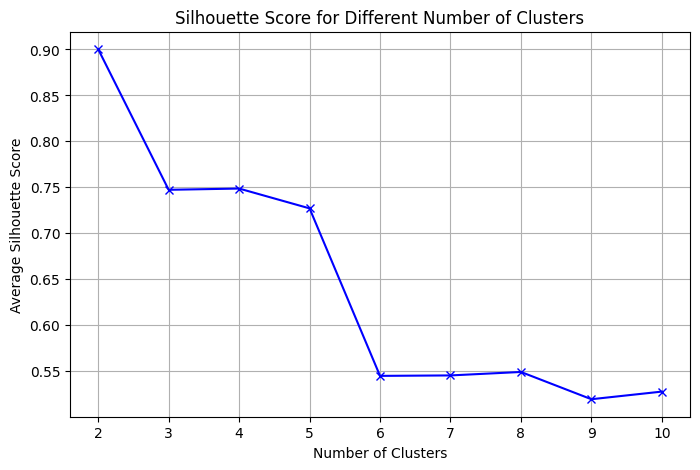

The optimal number of clusters is: 2


In [30]:
# The image below is not the final result, if yours looks different, that’s okay.
cluster_range = list(range(2, 11))

# List to hold silhouette scores
score_results = []

# Loop over each possible cluster size
for clusters in cluster_range:
    model = AgglomerativeClustering(n_clusters=clusters, linkage='ward')
    labels = model.fit_predict(data)  # No scaling applied here

    # Calculate silhouette score for the current clustering
    avg_silhouette = silhouette_score(data, labels)
    score_results.append(avg_silhouette)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, score_results, linestyle='-', marker='x', color='b')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

# Identify the optimal number of clusters
optimal_clusters = cluster_range[score_results.index(max(score_results))]
print(f"The optimal number of clusters is: {optimal_clusters}")

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [31]:
# agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')  # 'ward' uses Euclidean distance by default
y_pred = agglo.fit_predict(data)  # Perform clustering


In [37]:
# Assuming 'data' is your dataset and 'sc' is the scaler
data_scaled = sc.fit_transform(data)  # Scaling the data

# Perform KMeans clustering (assuming you've already done this)
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Perform Agglomerative clustering (assuming you have y_pred for Agglo labels)
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo_labels = agglo.fit_predict(data_scaled)

# Inverse the scaling to return the original data
data_inverse = pd.DataFrame(sc.inverse_transform(data_scaled), columns=data.columns)

# Add KMeans and Agglo cluster labels to the dataframe
data_inverse['KMeans'] = kmeans_labels
data_inverse['Agglo'] = agglo_labels

# Show the dataframe with both clustering results
data_inverse.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,Cluster,Agglo
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,2,0.0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,1,2.0,1
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,2,0.0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,2,0.0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,2,0.0,0


Display the cluster summary in the form of a dataframe.

In [38]:
cluster_summary_1 = data_inverse.groupby('Agglo').agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max']
})

# Rename the axis to reflect Agglomerative Clustering
cluster_summary_1 = cluster_summary_1.rename_axis("Agglo")

# Display the cluster summary
cluster_summary_1


Area Category           Luas Tanah (m2)                \
               mode  min  max            mean   min     max   
Agglo                                                         
0               2.0  1.0  4.0      280.412621  50.0  1561.0   
1               3.0  2.0  4.0      118.980392  14.0   495.0   

      Luas Bangunan (m2)               Jumlah Kamar             \
                    mean   min     max         mode  min   max   
Agglo                                                            
0             340.514563  75.0  1200.0          5.0  3.0  13.0   
1             117.588235  14.0   495.0          2.0  1.0   5.0   

      Jumlah Kamar Mandi            Tingkat/Lantai             
                    mode  min   max            mode  min  max  
Agglo                                                          
0                    4.0  1.0  13.0             2.0  1.0  4.0  
1                    2.0  1.0   4.0      [1.0, 2.0]  1.0  2.0

In [40]:
# Assuming 'data_inverse' contains the original data with both KMeans and Agglo labels
# Use the Agglo cluster labels (y_pred) for summarizing
cluster_summary_2 = data_inverse.groupby('Agglo').agg({
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

# Rename the axis to reflect Agglomerative Clustering
cluster_summary_2 = cluster_summary_2.rename_axis("Agglo")

# Display the cluster summary
cluster_summary_2


Harga Penawaran (dari Owner)                            Terjual/Belum  \
                              mean          min           max          mode   
Agglo                                                                         
0                     6.751048e+09  645000000.0  9.900000e+10           1.0   
1                     1.506754e+09  160000000.0  1.050000e+10           1.0   

      Arah Hadap Rumah Posisi Rumah Lebar Jalan Depan Rumah (ROW)  
                  mode         mode                          mode  
Agglo                                                              
0                  3.0          2.0                           2.0  
1                  3.0          2.0                           2.0

In [41]:
data_inverse['Agglo'].value_counts().sort_index()

,count
Agglo,
0,206
1,102


In [ ]:
# write down your interpretation from the cluster that you have been made

Agglo Cluster 0 represents high-end properties with larger areas, higher prices, and more floors, appealing to affluent buyers who can afford luxury homes.
Agglo Cluster 1 represents budget-friendly properties, with smaller sizes, fewer floors, and more affordable prices, targeting middle-income buyers.

**Hierarchical Visualization**

Single Linkage

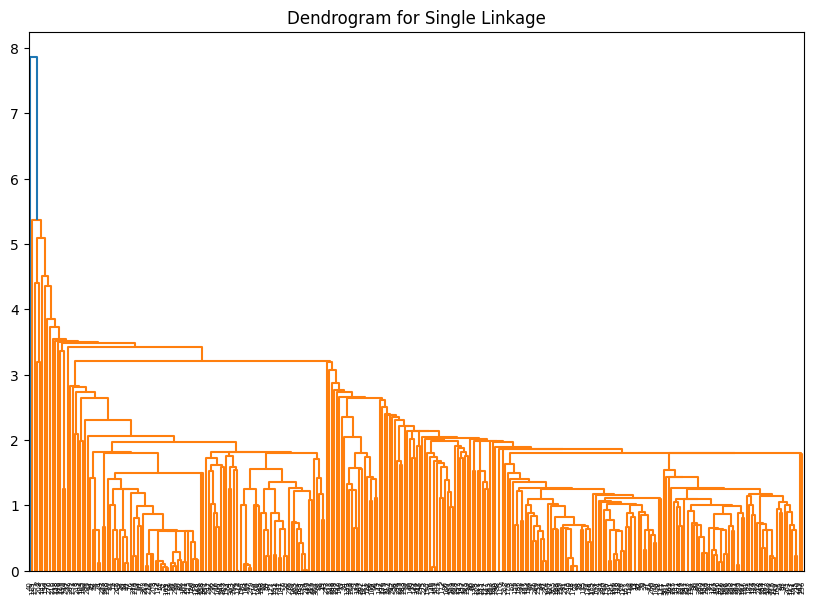

In [45]:
# Assuming 'data' is your original dataframe
sc = StandardScaler()
data_scaled = pd.DataFrame(sc.fit_transform(data), columns=data.columns)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(data_scaled, method='single'))
plt.show()

complete linkage

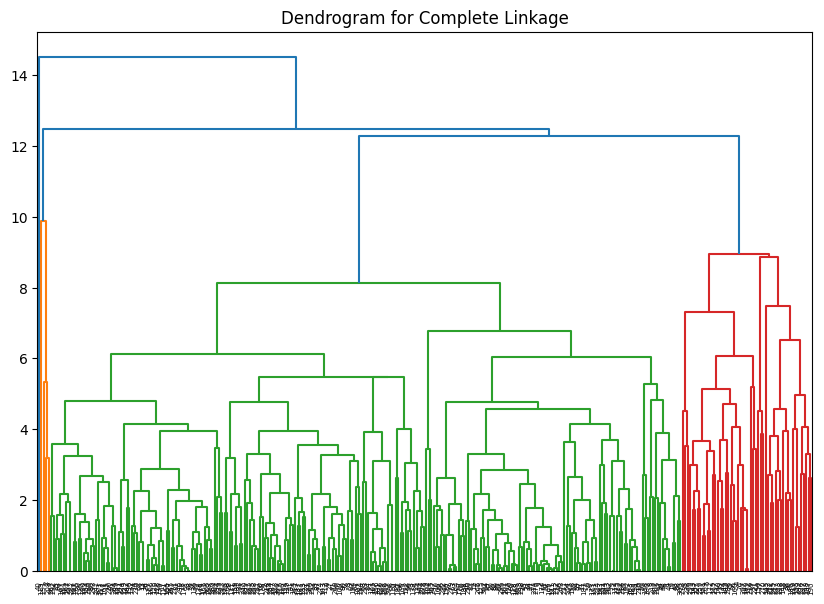

In [46]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(data_scaled, method='complete'))
plt.show()

average linkage

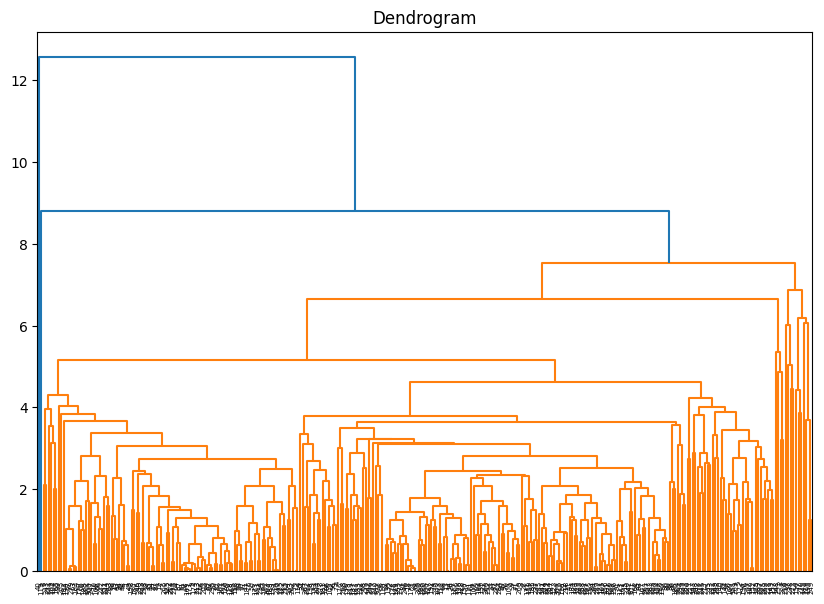

In [47]:

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(data_scaled, method='average'))
plt.show()

ward method

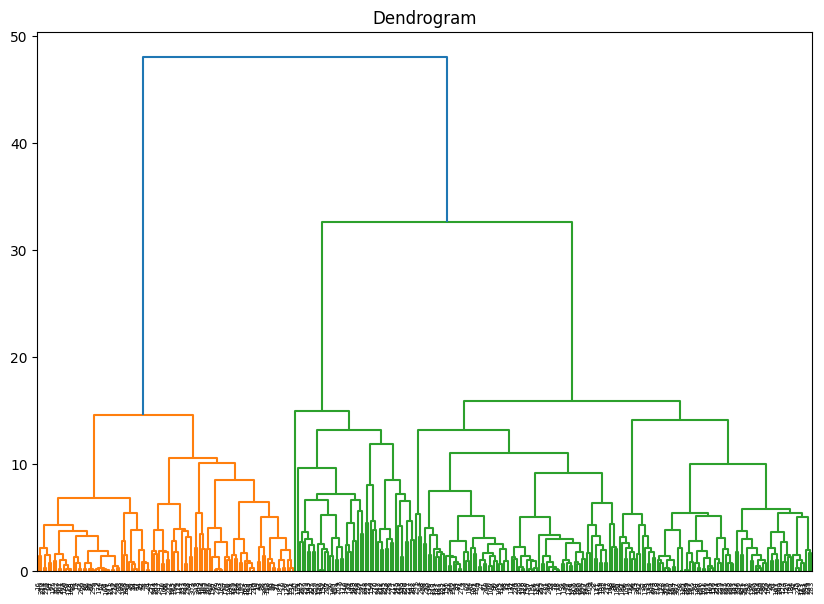

In [48]:

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.show()